In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans



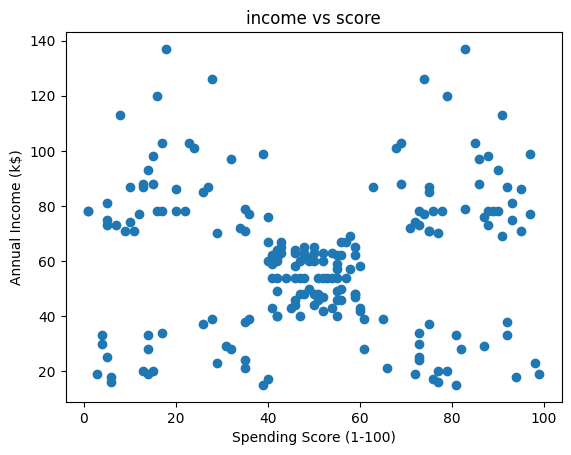

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df=pd.read_csv('/content/mall customers.csv')
plt.scatter(df['Spending Score (1-100)'],df['Annual Income (k$)'])
plt.ylabel('Annual Income (k$)')
plt.xlabel('Spending Score (1-100)')
plt.title("income vs score")
plt.show()
df
#https://www.youtube.com/watch?v=5UUV0PJW34o&list=PLKdU0fuY4OFfWY36nDJDlI26jXwInSm8f&index=80
#1.27.11

In [4]:
df=df.rename(columns={'Gender':'gender','Annual Income (k$)':'Income','Spending Score (1-100)':'score'})
df=df.drop('CustomerID', axis=1)
df

,gender,Age,Income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [55]:
labelenco=LabelEncoder()
df['gender']=labelenco.fit_transform(df['gender'])
df1=df.copy()
df.describe()


4

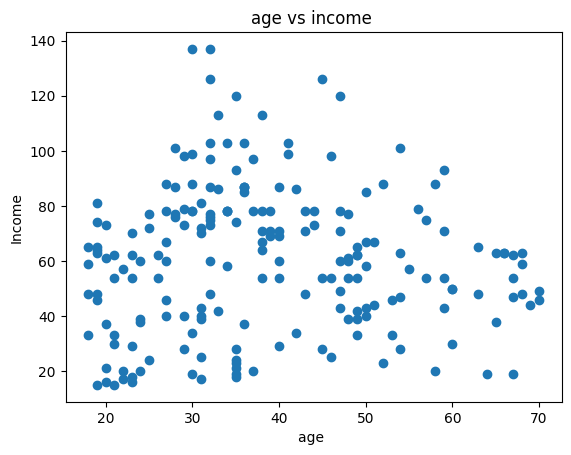

In [6]:
plt.scatter(df['Age'],df['Income'])
plt.xlabel('age ')
plt.ylabel('Income')
plt.title('age vs income ')
plt.show()

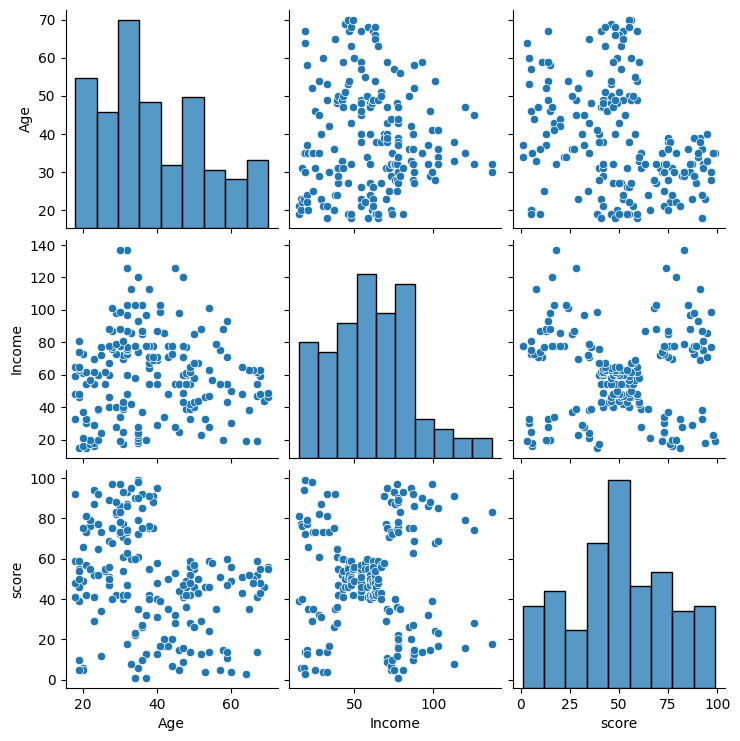

In [7]:
sns.pairplot(df[['Age','Income','score']])

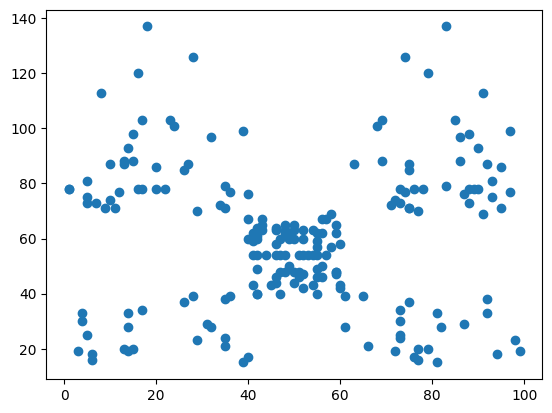

In [8]:
plt.scatter(df['score'],df['Income'])
plt.show()

In [9]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=8, random_state=42)
km.fit(df[['Income', 'score']])

df["Cluster"]=km.predict(df[['Income', 'score']])
# df=df[['gender','Age','Income','score','Cluster']]
# df
print("your dataframe shape is ",df.shape)

your dataframe shape is  (200, 5)


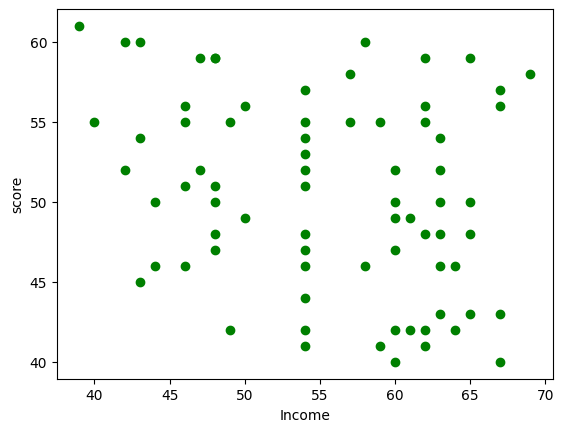

(74, 5)

In [10]:
df0=df[df.Cluster==0]
plt.scatter(df0.Income,df0.score,color='green')
plt.xlabel("Income")
plt.ylabel('score')
plt.show()
df0.shape



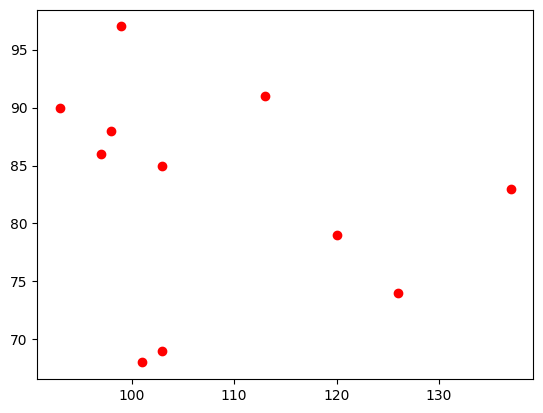

(11, 4)

In [11]:
df1=df[df.Cluster==1]
df1=df1[['gender','Age','Income','score']]
plt.scatter(df1.Income,df1.score,color='red')
plt.show()
df1.shape

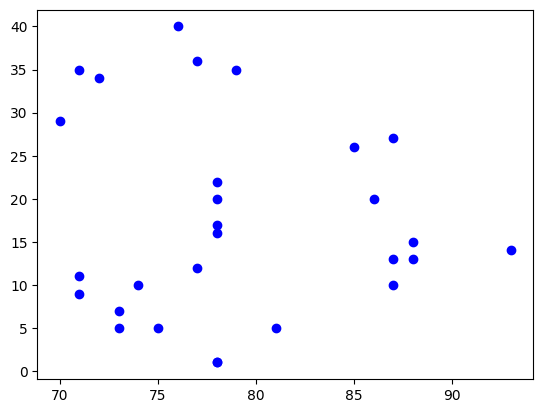

In [12]:
df2=df[df.Cluster==2]
plt.scatter(df2.Income,df2.score,color='blue')
plt.show()

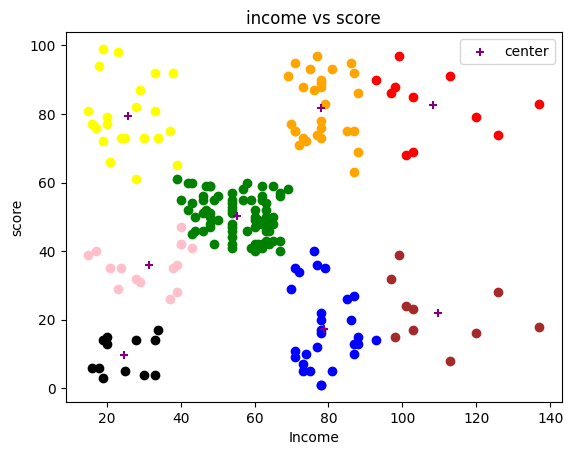

5
300


In [31]:
df0=df[df.Cluster==0]
df1=df[df.Cluster==1]
df2=df[df.Cluster==2]
df3=df[df.Cluster==3]
df4=df[df.Cluster==4]
df5=df[df.Cluster==5]
df6=df[df.Cluster==6]
df7=df[df.Cluster==7]
plt.scatter(df0.Income,df0.score,color='green')
plt.scatter(df1.Income,df1.score,color='red')
plt.scatter(df2.Income,df2.score,color='blue')
plt.scatter(df3.Income,df3.score,color='yellow')
plt.scatter(df4.Income,df4.score,color='black')
plt.scatter(df5.Income,df5.score,color='orange')
plt.scatter(df6.Income,df6.score,color='pink')
plt.scatter(df7.Income,df7.score,color='brown')

center=km.cluster_centers_
x=center[:,0]
y=center[:,1]

plt.scatter(x,y,color='purple',marker='+',label='center')
plt.title('income vs score')
plt.xlabel('Income')
plt.ylabel('score')
plt.legend()
plt.show()
# print(km.n_iter_)
# print(km.max_iter)


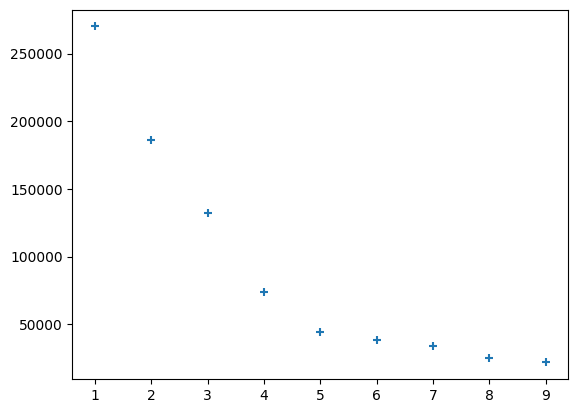

In [38]:
wcss=[]
for i in range(1,10):
  km=KMeans(n_clusters=i)
  km.fit(df[['Income','score']])
  wcss.append(km.inertia_)

plt.scatter(range(1,10),wcss,marker='+')
plt.show()

4


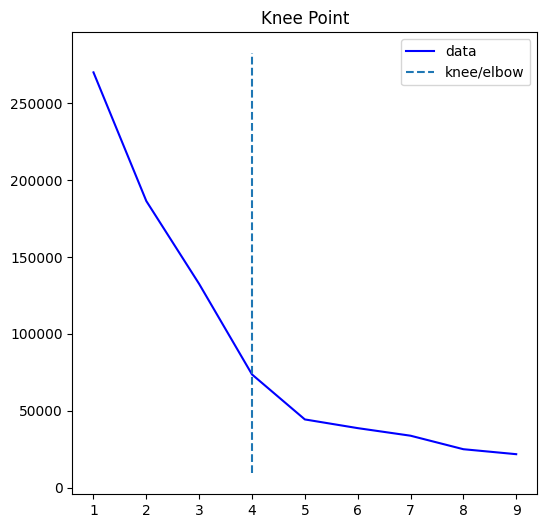

In [56]:

# from kneed import KneeLocator
# kn=knee_locator(range(1,10),wcss,curve="convex",direction='decreassing')
# kn
from kneed import KneeLocator
kn=KneeLocator(range(1,10),wcss,curve="convex",direction='decreasing') # corrected function name and 'decreasing'
print(kn.knee)
kn.plot_knee()